In [1]:
# import libraries needed
import pandas as pd

# read in the data from CSV file using pandas
data = pd.read_csv('UMTMVS.csv')

# display the head to confirm the data was loaded correctly 
data.head()

,DATE,UMTMVS
0,1992-01-01,209438.0
1,1992-02-01,232679.0
2,1992-03-01,249673.0
3,1992-04-01,239666.0
4,1992-05-01,243231.0


In [2]:
# read in the data again, but make the Date the index column
data = pd.read_csv('UMTMVS.csv', index_col='DATE')

# display the head again to confim correct data
data.head()

,UMTMVS
DATE,
1992-01-01,209438.0
1992-02-01,232679.0
1992-03-01,249673.0
1992-04-01,239666.0
1992-05-01,243231.0


In [3]:
# Get more information about the index, and see if pandas automatically converted the date to Date Time or left it as an object
data.index

# after executing this line we see that it pandas did not convert it and left it as an object

Index(['1992-01-01', '1992-02-01', '1992-03-01', '1992-04-01', '1992-05-01',
       '1992-06-01', '1992-07-01', '1992-08-01', '1992-09-01', '1992-10-01',
       ...
       '2019-12-01', '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
       '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01', '2020-09-01'],
      dtype='object', name='DATE', length=345)

In [4]:
# Convert the data type of the index from an object to a data time dataype using the pandas function to_datetime
data.index = pd.to_datetime(data.index)

# display index to confirm that the index data type was successfully converted
data.index

# The index data type is now date time with percision up to a nanosecond.

DatetimeIndex(['1992-01-01', '1992-02-01', '1992-03-01', '1992-04-01',
               '1992-05-01', '1992-06-01', '1992-07-01', '1992-08-01',
               '1992-09-01', '1992-10-01',
               ...
               '2019-12-01', '2020-01-01', '2020-02-01', '2020-03-01',
               '2020-04-01', '2020-05-01', '2020-06-01', '2020-07-01',
               '2020-08-01', '2020-09-01'],
              dtype='datetime64[ns]', name='DATE', length=345, freq=None)

In [5]:
# instead of going through the trouble of manually convirting the index data type we can automatically do that using a parameter in panda's read_csv function called parse_data
data = pd.read_csv('UMTMVS.csv', index_col='DATE', parse_dates=True)

# confirm the index's data type was updated correctly
data.index

DatetimeIndex(['1992-01-01', '1992-02-01', '1992-03-01', '1992-04-01',
               '1992-05-01', '1992-06-01', '1992-07-01', '1992-08-01',
               '1992-09-01', '1992-10-01',
               ...
               '2019-12-01', '2020-01-01', '2020-02-01', '2020-03-01',
               '2020-04-01', '2020-05-01', '2020-06-01', '2020-07-01',
               '2020-08-01', '2020-09-01'],
              dtype='datetime64[ns]', name='DATE', length=345, freq=None)

In [6]:
# get the data from 2000-01-01 to 2015-05-01 using the loc function
data.loc['2000-01-01' : '2015-01-01']

,UMTMVS
DATE,
2000-01-01,314656.0
2000-02-01,342744.0
2000-03-01,374859.0
2000-04-01,344093.0
2000-05-01,356402.0
...,...
2014-09-01,512979.0
2014-10-01,505469.0
2014-11-01,458120.0


In [7]:
# Here we want to get the data from the first month using the same .loc fucntion. To get the data from the first month we take a year step or 12 month so we only get back the results from january of every year from 1992 to 2000
data.loc['1992-01-01' : '2000-01-01' : 12]

,UMTMVS
DATE,
1992-01-01,209438.0
1993-01-01,223258.0
1994-01-01,234097.0
1995-01-01,260175.0
1996-01-01,263041.0
1997-01-01,280870.0
1998-01-01,290004.0
1999-01-01,293222.0
2000-01-01,314656.0


In [8]:
# Here we want to resample with a Year Start rule, then we aggrigate a couple more function to use the data that the previous function returned. In this case we want to get the mean of the regrouped section. Finally we want to see the top couple rows so we call head
data.resample(rule='AS').mean().head()

,UMTMVS
DATE,
1992-01-01,242002.000000
1993-01-01,251708.083333
1994-01-01,269842.666667
1995-01-01,289973.083333
1996-01-01,299765.666667


In [9]:
# create a custom function that returns the sum of the value that is passed in 
def sum_of_year(year_val):
    return year_val.sum()

In [10]:
# Here we apply our own function to the reampled data set to return the sum of all the grouped items
data.resample(rule='AS').apply(sum_of_year)

,UMTMVS
DATE,
1992-01-01,2904024.0
1993-01-01,3020497.0
1994-01-01,3238112.0
1995-01-01,3479677.0
1996-01-01,3597188.0
1997-01-01,3834699.0
1998-01-01,3899813.0
1999-01-01,4031887.0
2000-01-01,4208584.0


In [11]:
# Here we can confirm that our custom fucntion is working correctly by comparing the result of a function where we manually add the .sum() operator to the end and a .appy(our_own_function) 
data.resample(rule='AS').apply(sum_of_year) == data.resample(rule='AS').sum()

,UMTMVS
DATE,
1992-01-01,True
1993-01-01,True
1994-01-01,True
1995-01-01,True
1996-01-01,True
1997-01-01,True
1998-01-01,True
1999-01-01,True
2000-01-01,True


In [12]:
# Here we take another sample of the data but this time we take a rolling sample. Of which we tak an average of 10 days and then display the first 20 values using the head function to specify we want the first 20 values. 

#For the first 9 values are Not a number because we do not have enough information about them the calculation starts at the 10th value once we have collected enough data to determine the mean of the rolling values. 
data.rolling(window=10).mean().head(20)

,UMTMVS
DATE,
1992-01-01,NaN
1992-02-01,NaN
1992-03-01,NaN
1992-04-01,NaN
1992-05-01,NaN
1992-06-01,NaN
1992-07-01,NaN
1992-08-01,NaN
1992-09-01,NaN


In [13]:
# using the same approach we are now grabbing the maximum value from a window of 30 days and displaying the top 20 values again using the head function

# here we have added the [30:] to exclude the first 30 entries because they will be NaN and it makes no sense to add them to our calulations 
data.rolling(window=30).max()[30:].head(20)

,UMTMVS
DATE,
1994-07-01,287336.0
1994-08-01,287336.0
1994-09-01,291357.0
1994-10-01,291357.0
1994-11-01,291357.0
1994-12-01,291357.0
1995-01-01,291357.0
1995-02-01,291357.0
1995-03-01,303201.0


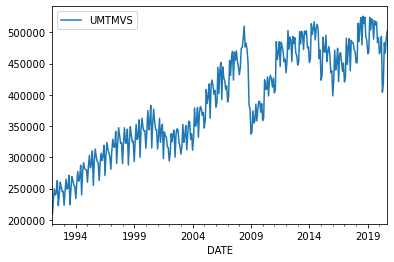

In [14]:
# here we visualize the data using a plot. and we see that there is a trend upward on the graph
data.plot()

[Text(0, 0.5, 'Value'), Text(0.5, 1.0, 'Value of Manufacturers Shipments')]

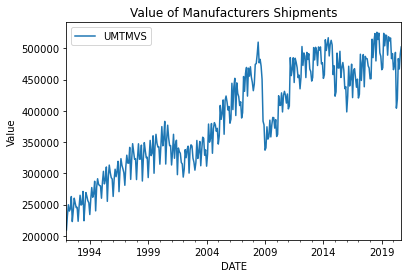

In [15]:
# set the plot to a value to it is easier for us to manipulate later
ax = data.plot()

# here we set the title and the y label of the graph so it more easily describes the data. 
ax.set(title='Value of Manufacturers Shipments', ylabel='Value')

[Text(0, 0.5, 'Value'), Text(0.5, 1.0, 'Value of Manufacturers Shipments')]

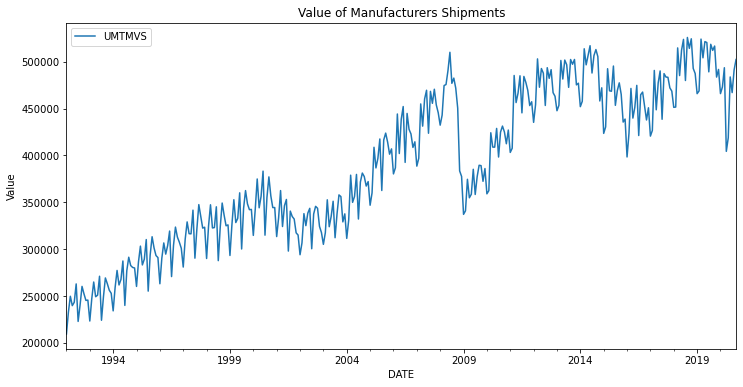

In [16]:
# here we change the plot size to be larger than the last by almost 2x
ax = data.plot(figsize=(12,6))

# this stays the same as the previous cell
ax.set(title='Value of Manufacturers Shipments', ylabel='Value')

[Text(0, 0.5, 'Value of Mean of Starting of Year'),
 Text(0.5, 1.0, 'Average of Manufacturers Shipments')]

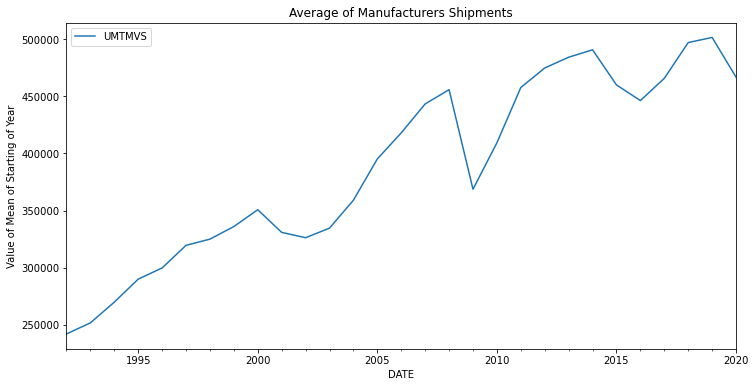

In [17]:
# here we are ploting the graphs with new data. 
# the data here is a grouped data is started at year start and then computed to find the mean and the final function that is attached is a plotting function to display the data visually
ax = data.resample(rule='AS').mean().plot(figsize=(12,6))

# set the title of the plot to what we previously set them as
ax.set(title='Average of Manufacturers Shipments', ylabel='Value of Mean of Starting of Year')

[Text(0, 0.5, 'Value of Mean of Starting of Year'),
 Text(0.5, 1.0, 'Average of Manufacturers Shipments')]

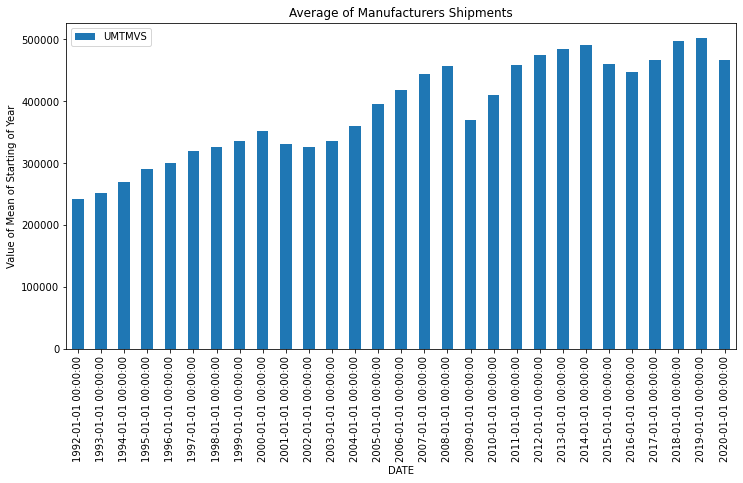

In [18]:
# in this function we do exactly what we did in the previous function but we use a different plot. In this case we use a bar plot to display the data
ax = data.resample(rule='AS').mean().plot.bar(figsize=(12,6))

# set the title of the plot to what we previously set them as
ax.set(title='Average of Manufacturers Shipments', ylabel='Value of Mean of Starting of Year')

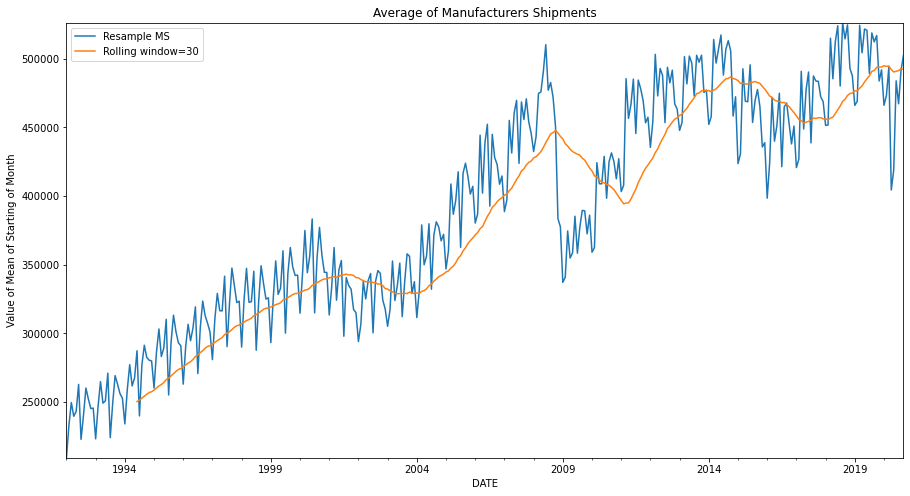

In [19]:
# in this functino we are takeing the data in UMTMVS and grouping it by month start. and plottingit using a larger plot than what we've been used to as well as labeling it properly 
ax = data['UMTMVS'].resample(rule='MS').mean().plot(figsize=(15,8), label='Resample MS')

# auto scaling the plot will remove any empty plot section and fill our plot with only usefull data
ax.autoscale(tight=True)

# The second line/orange line that we are plottin is the rolling window so this section is the mean of the months starting at 30 months after the first record was recorded and it follows the same patter that resample follows. 
data.rolling(window=30).mean()['UMTMVS'].plot(label='Rolling window=30')

# this sets the labes to display something meaningful so we know what this graph is about 
ax.set(ylabel='Value of Mean of Starting of Month',title='Average of Manufacturers Shipments')

# The legend allows us to distinguish between both lines and makes it clear
ax.legend()

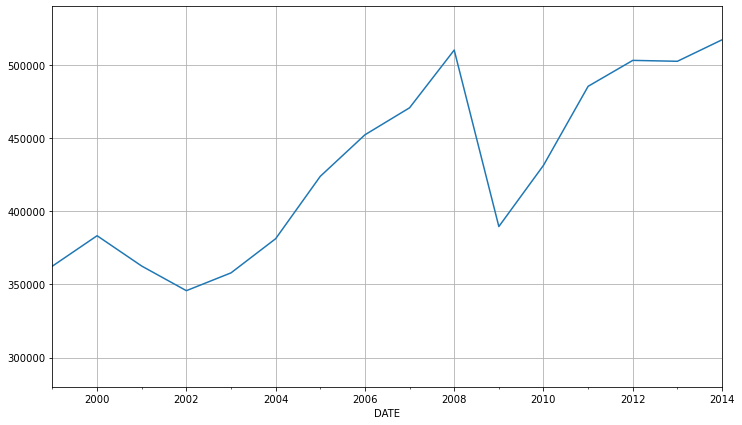

In [20]:
# here we want to plot the data from start of every year then the following function aggrigates the max of every year. Then we plot the graph with some parameters such as an x limit starting at 1999 and going until 2014 and a y Limit going from 280,000 to 540,000 with a plot size of 12 by 7 
ax = data['UMTMVS'].resample(rule='AS').max().plot(xlim=["1999-01-01","2014-01-01"],ylim=[280000,540000], figsize=(12,7))

# this sets the y axis grid lines
ax.yaxis.grid(True)

# this sets the x axis grid lines
ax.xaxis.grid(True)


### Time Series Forcasting
#### As the assignment went on we learned how to manipulate the data to use the Date Time object and then form it to display data grouped by time (such as month, year, day) to display trends via number. Then we moved on to learn how to plot the data and add a visual aspect to the Date Time values pair. Finally we got the chance to aggrigate the functions we learned in the beginning of the assignment and the plots in the middle of the assignment to display a more detailed visually apealing graph

#### Given the graphs that we created we can assume there is an upward trend and we can exect to see a growth in the comming years given, nothing crazy, like a pandemic, happens. 
